<a href="https://colab.research.google.com/github/Saurav2910/My-Deeplearning-Projects/blob/main/Stock_Price_Prediction_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# Load Data


In [2]:
company = "FB"

In [3]:
start = dt.datetime(2012,1,1)
end = dt.datetime(2020,1,1)

In [4]:
data = web.DataReader(company,'yahoo',start,end)

#Prepare Data

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [6]:
prediction_days=60

In [7]:
x_train = []
y_train = []

In [8]:
for x in range(prediction_days,len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x,0])
  y_train.append(scaled_data[x,0])

In [9]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [10]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

#Build the Model

In [17]:
model = Sequential()

In [18]:
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))



In [21]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25,batch_size=32)

Epoch 1/25
59/59 [==============================] - 9s 76ms/step - loss: 0.0633
Epoch 2/25
59/59 [==============================] - 5s 78ms/step - loss: 0.0050
Epoch 3/25
59/59 [==============================] - 5s 80ms/step - loss: 0.0041
Epoch 4/25
59/59 [==============================] - 5s 79ms/step - loss: 0.0038
Epoch 5/25
59/59 [==============================] - 5s 79ms/step - loss: 0.0035
Epoch 6/25
59/59 [==============================] - 5s 77ms/step - loss: 0.0033
Epoch 7/25
59/59 [==============================] - 5s 78ms/step - loss: 0.0031
Epoch 8/25
59/59 [==============================] - 5s 77ms/step - loss: 0.0032
Epoch 9/25
59/59 [==============================] - 4s 75ms/step - loss: 0.0032
Epoch 10/25
59/59 [==============================] - 5s 77ms/step - loss: 0.0027
Epoch 11/25
59/59 [==============================] - 4s 76ms/step - loss: 0.0027
Epoch 12/25
59/59 [==============================] - 4s 75ms/step - loss: 0.0028
Epoch 13/25
59/59 [==================

#Load Test Data

In [22]:
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

In [23]:
test_data = web.DataReader(company,'yahoo',test_start,test_end)
actual_prices = test_data['Close'].values

In [24]:
total_dataset = pd.concat((data['Close'],test_data['Close']),axis=0)

In [26]:
model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

# Make Predication on Test data

In [27]:
x_test = []

In [28]:
for x in range(prediction_days,len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x,0])

In [29]:
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [30]:
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot the Predictions

No handles with labels found to put in legend.


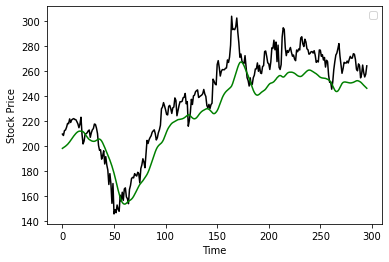

In [34]:
plt.plot(actual_prices,color="black")
plt.plot(predicted_prices,color="green")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()